In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('test.png',1)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

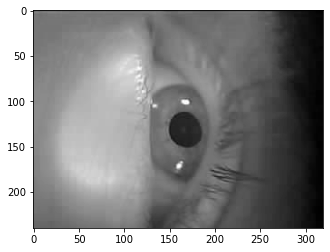

In [5]:
plt.imshow(gray_img,cmap="gray")

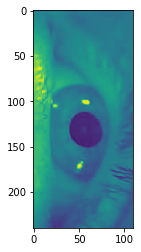

In [8]:
ROI_Image = gray_img[:,110:220]
plt.imshow(ROI_Image)

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
blur = cv2.GaussianBlur(ROI_Image,(3,3),0)

ret,thresh1 = cv2.threshold(blur,60,255,cv2.THRESH_BINARY)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


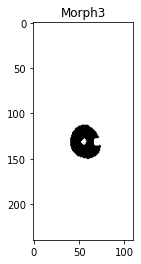

In [11]:
# showing image
plt.imshow(closing,cmap="gray")
plt.axis('on')
plt.title("Morph3")
plt.imsave("MorphImage.png",closing)

### Examples of some pictures

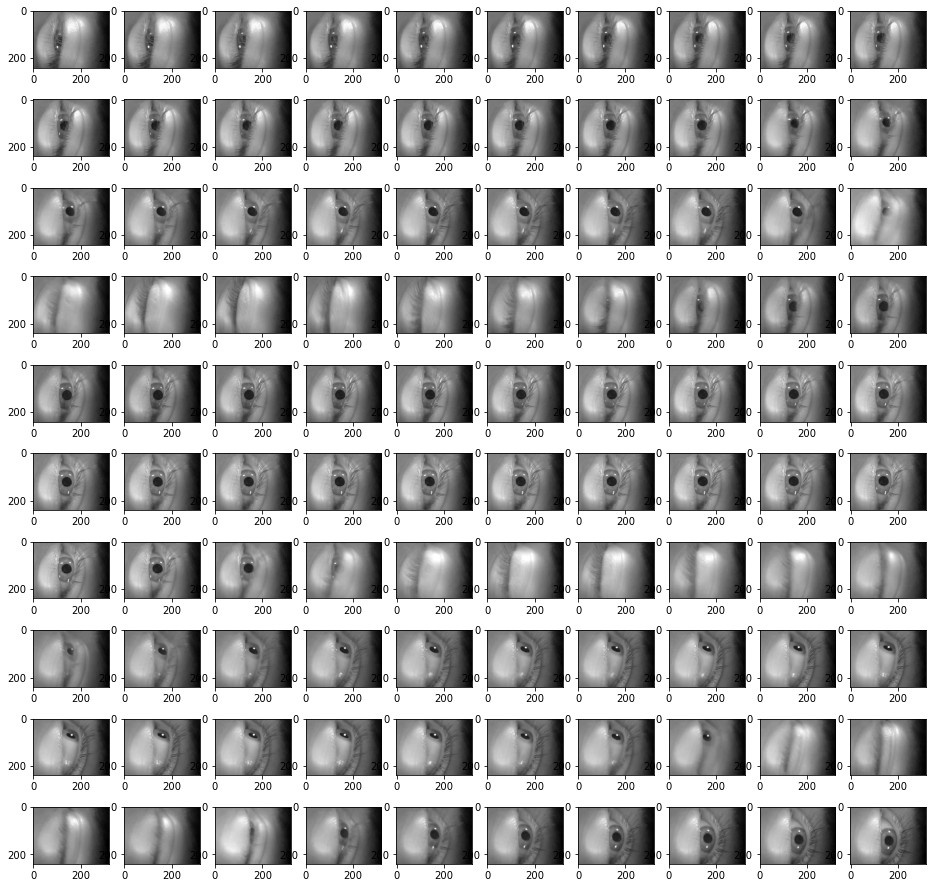

In [13]:
cap = cv2.VideoCapture("outpy.avi")
fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(16,16))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

for i in range(10):
    for j in range(10):
        ret, img = cap.read()
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        ax[i,j].imshow(gray_img,cmap="gray")
        

### Examples Of some pictures after morphological operations

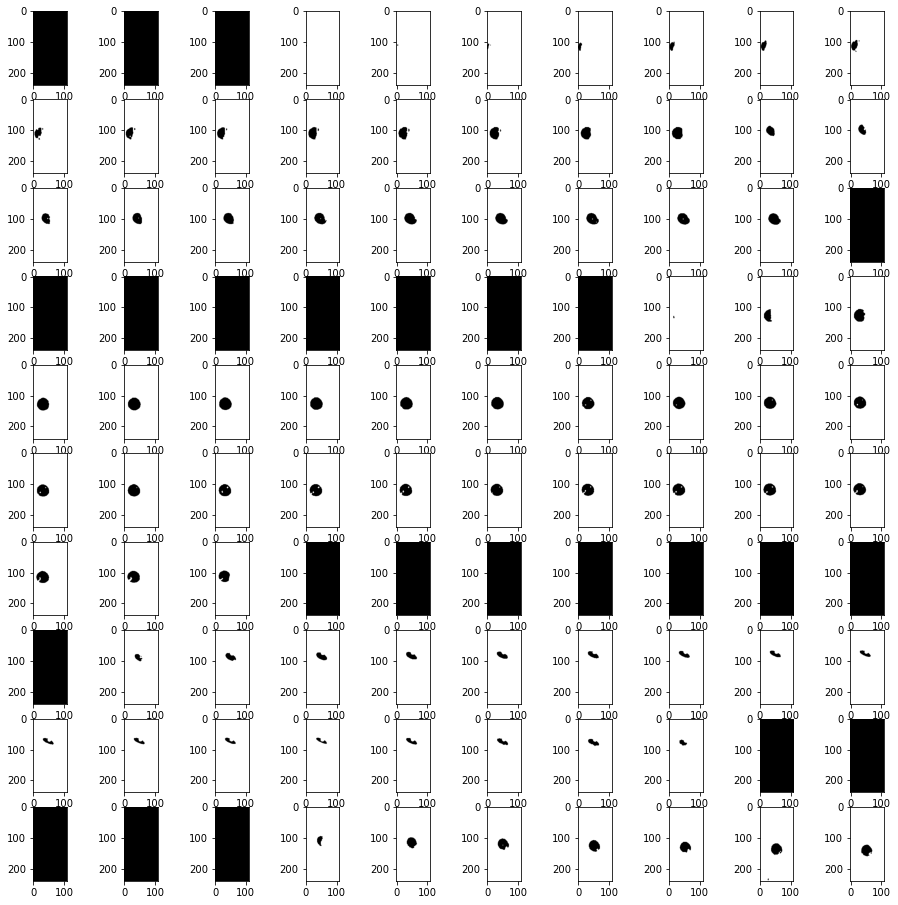

In [14]:
cap = cv2.VideoCapture("outpy.avi")
fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(16,16))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

for i in range(10):
    for j in range(10):
        ret, img = cap.read()
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        ROI_Image = gray_img[:,110:220]
        blur = cv2.GaussianBlur(ROI_Image,(3,3),0)

        ret,thresh1 = cv2.threshold(blur,60,255,cv2.THRESH_BINARY)
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
        closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

        ax[i,j].imshow(closing,cmap="gray")
        

In [22]:
def fitPupil(image):
        temp_image = image.copy()
        image_gray = cv2.cvtColor(temp_image , cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(image_gray,(3,3),0)
        ret,thresh1 = cv2.threshold(blur,60,255,cv2.THRESH_BINARY)
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
        closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

        temp_image  = 255 - closing
        contours, hierarchy = cv2.findContours(temp_image , cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        hull = []
        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * (area / (perimeter * perimeter))

            circularity_thresh = 0.0
            if circularity > circularity_thresh:
                hull.append(cv2.convexHull(contour, False))
            
        cnt = sorted(hull, key=cv2.contourArea)
        return cnt

In [30]:
cap = cv2.VideoCapture("http://192.168.1.100:81/stream")


while True:
    ret, img = cap.read()
    
    #gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    if ret:

        ROI_Image = img[:,110:270]

        cnt = fitPupil(ROI_Image)
        if cnt:
            
            try:
                maxcnt = cnt[-1]
                
                ellipse = cv2.fitEllipse(maxcnt)
                
                
                #if el_size < threshold2 and el_size > threshold1:
                
                cv2.ellipse(ROI_Image,ellipse,(0,255,0),1)
                    
                    
            except: pass
        
        cv2.imshow("Frame",ROI_Image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else: break
cap.release()
cv2.destroyAllWindows()
        
    